In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1D traffic flow model
method = 2 # 1 = FTCS, 2 = Lax, 3 = Lax-Wendroff


In [3]:
N = 81 # number of grid points in x
tau = 0.2 # time step in t
L = 1600.0 # system size in meters
h = L/(N-1)
v_max = 25.0 # in m/s ... approx. 50 mph

coeff = tau/(2.0*h)
coefflw = tau**2/(2*h**2)

print ('Coefficient = ',coeff)

nStep = 1200

print ('End time = ',nStep*tau)

Coefficient =  0.005
End time =  240.0


In [4]:
#
# Initial conditions
#
rho_max = 1.0
Flow = np.empty(N)
cp = np.empty(N); cm = np.empty(N)

# Initial setup is a square pulse from -L/4 to 0
rho = np.zeros(N)
for i in range(int(N/16),int(N/8)):
    rho[i] = rho_max
    
rho[int(N/8)]=rho_max/2.0 # Set the value at x = 0 to half of rho_max to make smooth transition

# Periodic boundary conditions
ip = np.arange(N) + 1
ip[N-1] = 0
im = np.arange(N) - 1
im[0] = N-1

In [5]:
iplot = 1
xplot = (np.arange(N)+1./2.)*h-L/2.0

In [6]:
rplot = np.empty((N,nStep+1))
rplot[:,0]=np.copy(rho)

#print (rho)
#print (rplot[:,0])

tplot = np.empty(nStep+1)
tplot[0] = 0

for istep in range(nStep):
    
    # Compute the Flow = (density)*(velocity)
    Flow[:] = rho[:] * (v_max*(1 - rho[:]/rho_max))
    
    if method == 1:
        # FTCS method
        rho[:] = rho[:] - coeff*(Flow[ip]-Flow[im])
    elif method == 2:
        # Lax method
        rho[:] = 0.5*(rho[ip]+rho[im]) - coeff*(Flow[ip]-Flow[im])
    else:
        # Lax-Wendroff Method
        cp[:] = v_max*(1 - (rho[ip]+rho[:])/rho_max)
        cm[:] = v_max*(1 - (rho[:]+rho[im])/rho_max)
        rho[:] = rho[:] - coeff*(Flow[ip]-Flow[im]) + coefflw*(cp[:]*(Flow[ip]-Flow[:]) - cm[:]*(Flow[:]-Flow[im]))
    
    rplot[:,iplot] = np.copy(rho)
    tplot[iplot] = tau*(istep+1)

    iplot += 1

In [7]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

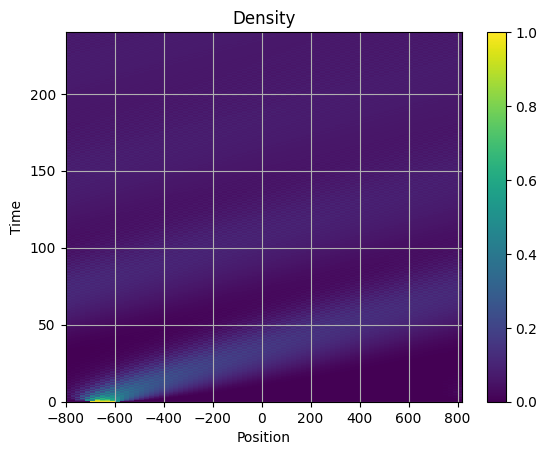

In [8]:
nplots = iplot
plt.figure()
X, T = np.meshgrid(xplot, tplot[:nplots])
plt.pcolormesh(X, T, rplot.T, shading='auto')
plt.colorbar()
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Density")
plt.grid()

plt.show()

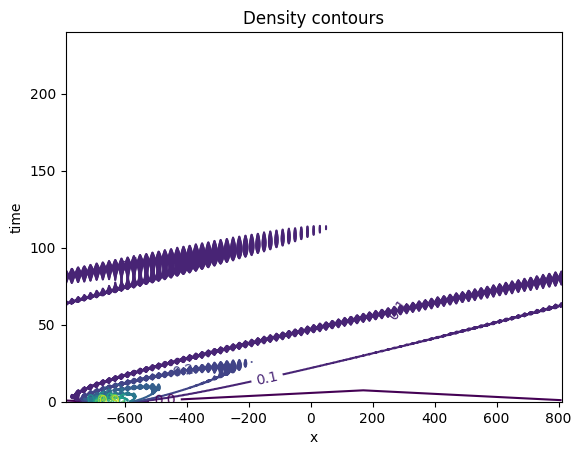

In [9]:
levels = np.linspace(0.,1.,num=11)
ct = plt.contour(xplot,tplot,np.flipud(np.rot90(rplot)), levels)
plt.clabel(ct,fmt='%1.1f')
plt.xlabel('x')
plt.ylabel('time')
plt.title('Density contours')
plt.show()

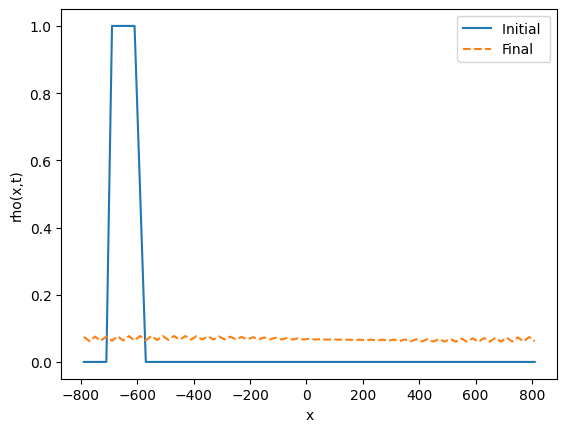

In [10]:
#plt.plot(xplot,rplot[:,0],'-',xplot,rplot,'--')
plt.plot(xplot,rplot[:,0],'-',xplot,rplot[:,iplot-1],'--')
plt.legend(['Initial ','Final'])
plt.xlabel('x')
plt.ylabel('rho(x,t)')
plt.show()

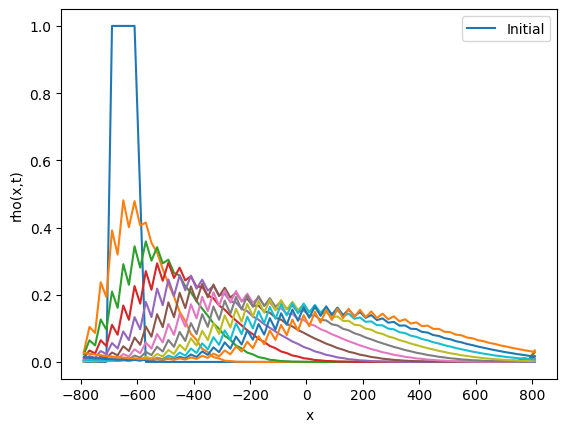

In [13]:
#plt.plot(xplot,rplot[:,0],'-',xplot,rplot,'--')
for i in range(0,int(iplot/5),20):
    plt.plot(xplot,rplot[:,i])
plt.legend(['Initial'])
plt.xlabel('x')
plt.ylabel('rho(x,t)')
plt.show()